# Goal

Steps:  
1 - Take a sample text data - load it
    Prepare all the charts and insights to be generated

2 - Modularize and functionize the approach

3 - Bring in upgraded functions and loading methods

4 - Build complete backend

## Step 1

### 1.A Data Ingestion - IMDB data

In [106]:
import pandas as pd
import numpy as np
from langdetect import detect
from langdetect import DetectorFactory
from google_trans_new import google_translator  
import google_trans_new as gtn
DetectorFactory.seed = 0

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [52]:
txtdat = pd.read_csv('IMDB_Dataset.csv')
txtdat.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
# Some manipulation to data
txtdat['review'][0] = 'மற்ற விமர்சகர்களில் ஒருவர் 1 அவுஸ் எபிசோடைப் பார்த்த பிறகு நீங்கள் கவர்ந்துவிடுவீர்கள் என்று குறிப்பிட்டுள்ளார். அவர்கள் சொல்வது சரிதான், ஏனெனில் இதுவே எனக்கு நடந்தது.<br /><br />ஓஸைப் பற்றி முதலில் என்னைத் தாக்கியது அதன் மிருகத்தனம் மற்றும் GO என்ற வார்த்தையிலிருந்து சரியாக அமைந்த வன்முறையின் அசைக்க முடியாத காட்சிகள். என்னை நம்புங்கள், இது மந்தமான உள்ளம் அல்லது கூச்ச சுபாவமுள்ளவர்களுக்கான நிகழ்ச்சி அல்ல. இந்த நிகழ்ச்சி போதைப்பொருள், பாலியல் அல்லது வன்முறை தொடர்பாக எந்த குத்துக்களையும் இழுக்கவில்லை. இந்த வார்த்தையின் உன்னதமான பயன்பாட்டில் இது ஹார்ட்கோர் ஆகும்.<br /><br />ஓஸ்வால்ட் அதிகபட்ச பாதுகாப்பு மாநில சிறைச்சாலைக்கு வழங்கப்பட்ட புனைப்பெயர் என்பதால் இது OZ என்று அழைக்கப்படுகிறது. இது முக்கியமாக எமரால்டு சிட்டியில் கவனம் செலுத்துகிறது, சிறைச்சாலையின் ஒரு சோதனைப் பிரிவானது, அங்கு அனைத்து அறைகளும் கண்ணாடி முன்பக்கமும் உள்நோக்கியும் இருக்கும், எனவே நிகழ்ச்சி நிரலில் தனியுரிமை அதிகமாக இல்லை. எம் சிட்டி பலரின் தாயகமாக உள்ளது..ஆரியர்கள், முஸ்லிம்கள், கும்பல்கள், லத்தினோக்கள், கிறிஸ்தவர்கள், இத்தாலியர்கள், ஐரிஷ்கள் மற்றும் பல....எனவே சண்டைகள், மரண வெறிகள், கேவலமான பரிவர்த்தனைகள் மற்றும் நிழலான ஒப்பந்தங்கள் ஒருபோதும் தொலைவில் இல்லை.<br /><br / > மற்ற நிகழ்ச்சிகள் தைரியமில்லாத இடத்திற்குச் செல்வதுதான் நிகழ்ச்சியின் முக்கிய ஈர்ப்பு என்று நான் கூறுவேன். முக்கிய பார்வையாளர்களுக்காக வரையப்பட்ட அழகான படங்களை மறந்துவிடு, அழகை மறந்துவிடு, காதலை மறந்துவிடு...OZ குழப்பமடையவில்லை. நான் பார்த்த முதல் எபிசோட் என்னை மிகவும் மோசமாக தாக்கியது, அது மிக மோசமானதாக இருந்தது, நான் அதற்கு தயாராக இருக்கிறேன் என்று சொல்ல முடியாது, ஆனால் நான் அதிகமாக பார்த்தபோது, ​​​​நான் Oz மீதான ரசனையை வளர்த்துக் கொண்டேன், மேலும் அதிக அளவிலான கிராஃபிக் வன்முறைக்கு பழகிவிட்டேன். வன்முறை மட்டுமல்ல, அநியாயமும் (நிக்கலுக்கு விற்கப்படும் வக்கிரக் காவலர்கள், உத்தரவின் பேரில் கொலை செய்து தப்பித்துக்கொள்ளும் கைதிகள், நல்ல நடத்தையுள்ள, நடுத்தர வர்க்க கைதிகள் தெருத் திறமையின்மையால் சிறைக் குட்டிகளாக மாற்றப்படுகிறார்கள். அல்லது சிறை அனுபவம்) ஓஸைப் பார்ப்பது, சங்கடமான பார்வையில் உங்களுக்கு வசதியாக இருக்கலாம்....உங்கள் இருண்ட பக்கத்தை நீங்கள் தொடர்பு கொள்ள முடிந்தால்.'

txtdat['conti_col'] = np.random.randint(1, 5, txtdat.shape[0])

txtdat['review'][121] = np.nan
txtdat['review'][21] = np.nan
txtdat['review'][78] = np.nan
txtdat['sentiment'][10] = np.nan


In [30]:
# Output file
file_name = 'automated_insights_analysis.xlsx'
insi = pd.ExcelWriter(file_name, engine='xlsxwriter')

### 1.B Additional information on data

#### Subset of data

The ability to fitler rows and columns based on condition.

First --> select row or column to be filtered
Second --> select filter type --> id, condition, names
Third --> Apply the filters and give conditions

In [6]:
# TBD

#### Language Translation

Give output language and select columns to be translated

In [3]:
#simple function to detect and translate text 
def detect_and_translate(text,target_lang):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        translator = google_translator()
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text 

In [7]:
txtdat.head()

,review,sentiment
0,மற்ற விமர்சகர்களில் ஒருவர் 1 அவுஸ் எபிசோடைப் ப...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
txtdat['review'] = txtdat['review'].apply(detect_and_translate,target_lang='en')

In [10]:
txtdat.head()

,review,sentiment
0,One of the other critics noted that you will b...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
# add a condition to include this only when translate function is called
txtdat.to_excel(insi, sheet_name='Translated_Subset')

#### Acknowledging Data Types

In [13]:
pd.DataFrame(txtdat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


""


In [29]:
datype = pd.DataFrame(txtdat.dtypes).reset_index()
datype.columns = ['Column_Name','Data_Type']
datype

,Column_Name,Data_Type
0,review,object
1,sentiment,object


In [32]:
datype.to_excel(insi, sheet_name='Final_Datatypes')

### 1.C Basic Insights

#### Data Summary

#Columns, #Rows, #Unique_Values, Data_Type, Distribution Summary for continuous variables, #Null values under each columns

In [99]:
def summary(dataf):
    sumy1 = pd.DataFrame(dataf.shape)
    sumy1.insert(0,'Dataframe_Shape',['No_of_rows','No_of_Columns'])
    
    sumy2 = pd.concat([pd.DataFrame(dataf.nunique()),pd.DataFrame(dataf.dtypes),dataf.isnull().sum()],axis=1).reset_index()
    sumy2.columns = ['Column_Name','No_Unique_Values','Data_Type','Count_Null_Values']
    
    sumy3 = dataf.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).describe().reset_index()
    sumy3.columns.values[0] = 'Metric'
    
    def multiple_dfs(df_list, sheets,filename, spaces):
        #writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
        row = 0
        for dataframe in df_list:
            dataframe.to_excel(insi,sheet_name='Basic_Insights_1',startrow=row , startcol=0)   
            row = row + len(dataframe.index) + spaces + 1
        #writer.save()

    # list of dataframes
    dfs = [sumy1,sumy2,sumy3]

    # run function
    multiple_dfs(dfs, 'Basic_Insights_1',file_name, 1)
    return print('success')

In [100]:
summary(txtdat)

success


#### Basic Visualisations

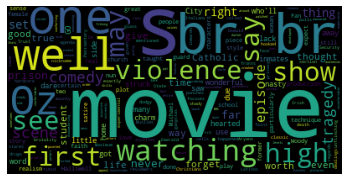

In [107]:
# Word Cloud
wordcloud = WordCloud().generate(str(txtdat['review'].values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Word X Count Graph

For this the nulls have to be replaced with 'blank' or have to be dropped

In [111]:
txtdat['review'].fillna('blank',inplace=True)
txtdat['sentiment'].fillna('blank',inplace=True)

In [ ]:

text= ' '.join(t for t in txtdat['review'])
words_list= text.split()

word_freq= {}
for word in set(words_list):
    word_freq[word]= words_list.count(word)
#Creating dataframe of words
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])

df_word['word_len']= df_word['word'].map(lambda x: len(x))
# sorting values 
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word

In [ ]:
df_top= df_word.head(50)
sns.barplot(df_top['count'],df_top['word'])

In [101]:
# Save excel
insi.save()